1.Marks Class Count Graph	2.Marks Class Semester-wise Graph
3.Marks Class Gender-wise Graph	4.Marks Class Nationalitywise Graph
5.Marks Class Grade-wise Graph	6.Marks Class Sectionwise Graph
7.Marks Class Topic-wise Graph	8.Marks Class Stage-wise Graph
9.Marks Class Absent Days-wise	10.No Graph

Enter Choice: 7
Loading Graph..

	Marks Class Topic-wise Graph


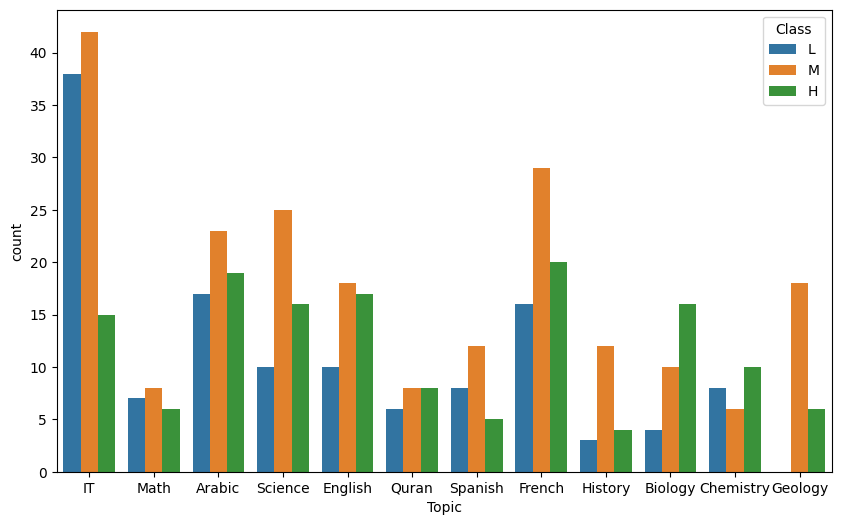

1.Marks Class Count Graph	2.Marks Class Semester-wise Graph
3.Marks Class Gender-wise Graph	4.Marks Class Nationalitywise Graph
5.Marks Class Grade-wise Graph	6.Marks Class Sectionwise Graph
7.Marks Class Topic-wise Graph	8.Marks Class Stage-wise Graph
9.Marks Class Absent Days-wise	10.No Graph



In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time as t
import sklearn.utils as u
import sklearn.preprocessing as pp
import sklearn.tree as tr
import sklearn.ensemble as es
import sklearn.metrics as m
import sklearn.linear_model as lm
import sklearn.neural_network as nn
import numpy as np
import warnings as w

data = pd.read_csv('xAPI-Edu-Data.csv')

w.filterwarnings('ignore')

ch = 0
while(ch != 10):
    print("1.Marks Class Count Graph\t2.Marks Class Semester-wise Graph\n3.Marks Class Gender-wise Graph\t4.Marks Class Nationalitywise Graph\n5.Marks Class Grade-wise Graph\t6.Marks Class Sectionwise Graph\n7.Marks Class Topic-wise Graph\t8.Marks Class Stage-wise Graph\n9.Marks Class Absent Days-wise\t10.No Graph\n")
    ch = int(input("Enter Choice: "))
    if (ch == 1):
        print("Loading Graph....\n")
        t.sleep(1)
        print("\tMarks Class Count Graph")
        axes = sb.countplot(x='Class', data=data, order=['L', 'M', 'H'])
        plt.show()
    elif (ch == 2):
        print("Loading Graph....\n")
        t.sleep(1)
        print("\tMarks Class Semester-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='Semester', hue='Class', data=data, hue_order=['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch == 3):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Gender-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='gender', hue='Class', data=data, order=['M', 'F'], hue_order=['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch == 4):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Nationality-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='NationalITy', hue='Class', data=data, hue_order=['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch == 5):
        print("Loading Graph: \n")
        t.sleep(1)
        print("\tMarks Class Grade-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='GradeID', hue='Class', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch ==6):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Section-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='SectionID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch == 7):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Topic-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='Topic', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch == 8):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Stage-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (ch == 9):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Absent Days-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='StudentAbsenceDays', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    if(ch == 10):
        print("Exiting..\n")
        t.sleep(1)

#cor = data.corr()
#print(cor)
data = data.drop("gender", axis=1)
data = data.drop("StageID", axis=1)
data = data.drop("GradeID", axis=1)
data = data.drop("NationalITy", axis=1)
data = data.drop("PlaceofBirth", axis=1)
data = data.drop("SectionID", axis=1)
data = data.drop("Topic", axis=1)
data = data.drop("Semester", axis=1)
data = data.drop("Relation", axis=1)
data = data.drop("ParentschoolSatisfaction", axis=1)
data = data.drop("ParentAnsweringSurvey", axis=1)
#data = data.drop("VisITedResources", axis=1)
data = data.drop("AnnouncementsView", axis=1)
u.shuffle(data)
countD = 0
countP = 0
countL = 0
countR = 0
countN = 0

gradeID_dict = {"G-01": 1, "G-02": 2, "G-03": 3, "G-04": 4, "G-05": 5, "G-06": 6, "G-07": 7, "G-08": 8, "G-09": 9, "G-10": 10, "G-11": 11, "G-12": 12}
data = data.replace({"GradeID": gradeID_dict})

ind = int(len(data) * 0.70)
feats = data.values[:, 0:4]
lbls = data.values[:, 4]

feats_Train = feats[0:ind]
feats_Test = feats[(ind+1):len(feats)]
lbls_Train = lbls[0:ind]
lbls_Test = lbls[(ind+1):len(lbls)]

modelD = tr.DecisionTreeClassifier()
modelD.fit(feats_Train, lbls_Train)
lbls_predD = modelD.predict(feats_Test)

for a, b in zip(lbls_Test, lbls_predD):
    if(a == b):
        countD += 1

accD = (countD / len(lbls_Test))
print("\nAccuracy measures using Decision Tree:")
print(m.classification_report(lbls_Test, lbls_predD), "\n")
print("\nAccuracy using Decision Tree: ", str(round(accD, 3)))
t.sleep(1)

modelR = es.RandomForestClassifier()
modelR.fit(feats_Train, lbls_Train)
lbls_predR = modelR.predict(feats_Test)

for a, b in zip(lbls_Test, lbls_predR):
    if(a == b):
        countR += 1

print("\nAccuracy Measures for Random Forest Classifier: \n")
# print("\nConfusion Matrix: \n", m.confusion_matrix(lbls_Test, lbls_predR))
print("\n", m.classification_report(lbls_Test, lbls_predR))

accR = countR / len(lbls_Test)
print("\nAccuracy using Random Forest: ", str(round(accR, 3)))
t.sleep(1)

modelP = lm.Perceptron()
modelP.fit(feats_Train, lbls_Train)
lbls_predP = modelP.predict(feats_Test)

for a, b in zip(lbls_Test, lbls_predP):
    if a == b:
        countP += 1

accP = countP / len(lbls_Test)
print("\nAccuracy measures using Linear Model Perceptron:")
print(m.classification_report(lbls_Test, lbls_predP), "\n")
print("\nAccuracy using Linear Model Perceptron: ", str(round(accP, 3)), "\n")
t.sleep(1)

modelL = lm.LogisticRegression()
modelL.fit(feats_Train, lbls_Train)
lbls_predL = modelL.predict(feats_Test)

for a, b in zip(lbls_Test, lbls_predL):
    if a == b:
        countL += 1

accL = countL / len(lbls_Test)
print("\nAccuracy measures using Linear Model Logistic Regression:")
print(m.classification_report(lbls_Test, lbls_predL), "\n")
print("\nAccuracy using Linear Model Logistic Regression: ", str(round(accP, 3)), "\n")
t.sleep(1)

modelN = nn.MLPClassifier(activation="logistic")
modelN.fit(feats_Train, lbls_Train)
lbls_predN = modelN.predict(feats_Test)

for a, b in zip(lbls_Test, lbls_predN):
    if a == b:
        countN += 1

# print("\nAverage value of Sigmoid Function: ", str(round(np.average(sig), 3)))
print("\nAccuracy measures using MLP Classifier:")
print(m.classification_report(lbls_Test, lbls_predN), "\n")

accN = countN / len(lbls_Test)
print("\nAccuracy using Neural Network MLP Classifier: ", str(round(accN, 3)), "\n")

choice = input("Do you want to test specific input (y or n): ")

if(choice.lower() == "y"):
    gen = input("Enter Gender (M or F): ")
    if (gen.upper() == "M"):
        gen = 1
    elif (gen.upper() == "F"):
        gen = 0

    nat = input("Enter Nationality: ")
    pob = input("Place of Birth: ")
    sta = input("Enter Stage ID(Lower level, Middle school, High school): ")

    if (sta == "Lower level"):
        sta = 2
    elif (sta == "Middle school"):
        sta = 1
    elif (sta == "High school"):
        sta = 0

    gra = input("Grade ID as (G-<grade>): ")
    if (gra == "G-02"):
        gra = 2
    elif (gra == "G-04"):
        gra = 4
    elif (gra == "G-05"):
        gra = 5
    elif (gra == "G-06"):
        gra = 6
    elif (gra == "G-07"):
        gra = 7
    elif (gra == "G-08"):
        gra = 8
    elif (gra == "G-09"):
        gra = 9
    elif (gra == "G-10"):
        gra = 10
    elif (gra == "G-11"):
        gra = 11
    elif (gra == "G-12"):
        gra = 12

    sec = input("Enter Section: ")
    top = input("Enter Topic: ")
    sem = input("Enter Semester (F or S): ")
    if (sem.upper() == "F"):
        sem = 0
    elif (sem.upper() == "S"):
        sem = 1

    rel = input("Enter Relation (Father or Mum): ")
    if (rel == "Father"):
        rel = 0
    elif (rel == "Mum"):
        rel = 1

    rai = int(input("Enter raised hands: "))
    res = int(input("Enter Visited Resources: "))
    ann = int(input("Enter announcements viewed: "))
    dis = int(input("Enter no. of Discussions: "))
    sur = input("Enter Parent Answered Survey (Y or N): ")
    if (sur.upper() == "Y"):
        sur = 1
    elif (sur.upper() == "N"):
        sur = 0

    sat = input("Enter Parent School Satisfaction (Good or Bad): ")
    if (sat == "Good"):
        sat = 1
    elif (sat == "Bad"):
        sat = 0
    absc = input("Enter No. of Abscenes(Under-7 or Above-7): ")
    if (absc == "Under-7"):
      absc = 1
    elif (absc == "Above-7"):
      absc = 0
    arr = np.array([rai, res, dis, absc])

# arr = np.array([gen, rnd.randint(0, 30), rnd.randint(0, 30), sta, gra, rnd.randint(0, 30), rnd.randint(0, 30), sem, rel, rai, res, ann, dis, sur, sat, absc])

predD = modelD.predict(arr.reshape(1, -1))
predR = modelR.predict(arr.reshape(1, -1))
predP = modelP.predict(arr.reshape(1, -1))
predL = modelL.predict(arr.reshape(1, -1))
predN = modelN.predict(arr.reshape(1, -1))

if (predD == 0):
    predD = "H"
elif (predD == 1):
    predD = "M"
elif (predD == 2):
    predD = "L"

if (predR == 0):
    predR = "H"
elif (predR == 1):
    predR = "M"
elif (predR == 2):
    predR = "L"

if (predP == 0):
    predP = "H"
elif (predP == 1):
    predP = "M"
elif (predP == 2):
    predP = "L"

if (predL == 0):
    predL = "H"
elif (predL == 1):
    predL = "M"
elif (predL == 2):
    predL = "L"

if (predN == 0):
    predN = "H"
elif (predN == 1):
    predN = "M"
elif (predN == 2):
    predN = "L"

t.sleep(1)
print("\nUsing Decision Tree Classifier: ", predD)

